# 1. Introduction
- <b>K-Nearest Neighbor</b> is a supervised learning algorithm, where data is trained with data points corresponding to their classification
- it takes into account the classes of the 'K' nearest data points and chooses the class in which the majority of the 'K' nearest data points belong to as the predicted class

### Here's an visualization of the K-Nearest Neighbors algorithm.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/images/KNN_Diagram.png">

- If we consider a k value of 3 nearest data points, we will obtain a prediction of Class B
- If we consider a k value of 6 nearest data points, we will obtain a prediction of Class A

# 2. Install the libaries and download the data

In [ ]:
# Libraries needed
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [54]:
# Steps optional! Ignore SSL Verification
import ssl

ssl._create_default_https_context = ssl._create_unverified_context
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


# About the dataset
Imagine a telecommunications provider has segmented its customer base by service usage patterns, categorising the customers into four groups. If demographic data can be used to predict group membership, the company can customise offers for individual prospective customers. It is a classification problem. That is, given the dataset,  with predefined labels, we need to build a model to be used to predict class of a new or unknown case.

The example focuses on using demographic data, such as region, age, and marital, to predict usage patterns.

The target field, called **custcat**, has four possible values that correspond to the four customer groups, as follows:
1- Basic Service
2- E-Service
3- Plus Service
4- Total Service

Our objective is to build a classifier, to predict the class of unknown cases. We will use a specific type of classification called K nearest neighbour.

# 3. Data Visualisation and Analysis

In [55]:
# How many custcat groups does the dataset have
castcat_groups = list(df['custcat'].value_counts())
print(f"{castcat_groups[0]} Plus Service")
print(f"{castcat_groups[1]} Basic-Service")
print(f"{castcat_groups[2]} Total Service")
print(f"{castcat_groups[3]} E-Service customers")

281 Plus Service
266 Basic-Service
236 Total Service
217 E-Service customers


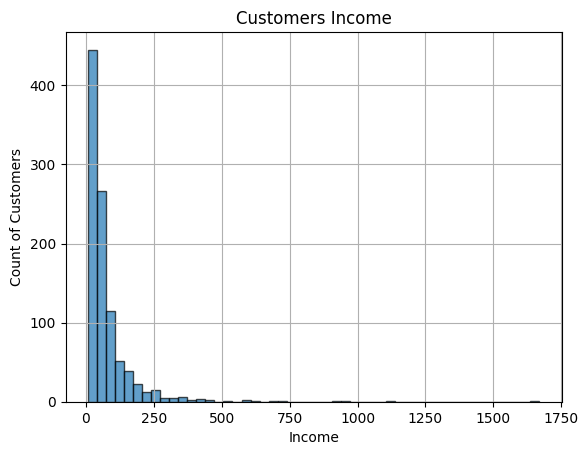

In [56]:
# Visualise the results
df.hist('income', bins=50, alpha=0.7, edgecolor='black')
plt.title("Customers Income")
plt.ylabel("Count of Customers")
plt.xlabel("Income")
plt.show()

# 4. Model Building
## 4.1 Feature set
Let's define sets, X:

In [ ]:
# List all columns 
df.columns

Index(['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed',
       'employ', 'retire', 'gender', 'reside', 'custcat'],
      dtype='object')

To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:

In [64]:
X = df[['region', 'tenure', 'age', 'marital', 'address', 'income', 'ed', 'employ', 'retire', 'gender', 'reside']].values
X[0:5]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.],
       [  2.,  33.,  33.,   0.,  12.,  33.,   2.,   0.,   0.,   1.,   1.],
       [  2.,  23.,  30.,   1.,   9.,  30.,   1.,   2.,   0.,   0.,   4.]])

The target labels are:

In [67]:
y = df['custcat'].values
y[0:5]

array([1, 4, 3, 1, 3])

## 4.2 Normalize Data
Data Standardisation gives the data zero mean and unit variance. It is important to normalise data for algorithms such as KNN which is based on the distance of data points.

In [72]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype('float'))
X[:5]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158],
       [ 1.19883553,  1.52109247,  0.82182601,  1.0100505 ,  1.23481934,
         0.35951747, -1.36767088,  1.78752803, -0.22207644,  0.96655883,
        -0.23065004],
       [-0.02696767, -0.11831864, -0.69181243, -0.9900495 ,  0.04453642,
        -0.41625141, -0.54919639, -1.09029981, -0.22207644,  0.96655883,
        -0.92747794],
       [-0.02696767, -0.58672182, -0.93080797,  1.0100505 , -0.25303431,
        -0.44429125, -1.36767088, -0.89182893, -0.22207644, -1.03459817,
         1.16300577]])

## 4.3 Train Test Split
Out of Sample Accuracy is the percentage that the model makes on data that the model has <b>not</b> been trained on. A high out-of-sample accuracy is important to make correct predictions on unknown data. The below Train/Test Splot will split our dataset into training and testing sets, which are mutually exclusive.

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (800, 11) (800,)
Test set: (200, 11) (200,)


## 4.4 Classification - K Nearest Neighbor (KNN)

In [ ]:
# We need to load our Classifer KNeigbors - Done in Part 1 of this Notebook
from sklearn.neighbors import KNeighborsClassifier

In [119]:
# We train the algorithm with a subjective k = 4
k = 4
# Train Model and Predict
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
# We can use the model to make predictions on the test set
yhat = neigh.predict(X_test)
print(f"The first five predicted classes (target values) are: {yhat[:5]}")

The first five predicted classes (target values) are: [1 1 3 2 4]


### Accuracy Evaluation
In multilabel classification, <b>accuracy classification score</b> is a function that computes subset accuracy. This function is equal to the jaccard_score function. It calculates how closely the actual labels and preducted labels are matched in the test set.

In [80]:
# from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5475
Test set Accuracy:  0.32


We can see, as we increase the k=6 our model evaluation is a bit more successful in predicting the target values. The below process will perfrom <b>hyperparameter tuning</b> for the KNN classifier by varying the number of neighbors k and evaluting the model's accuracy on a test dataset. The goal ofis to determine the optimal number of neighbors that results in the highest classification accuracy on the test set.

In [ ]:
# Hyperparameter tuning
Ks = 10                             # Specifies the range of K values to evaluate (from 1 to 9 neighbors)
mean_acc = np.zeros((Ks-1))         # Arrays to store the mean accuracy 
std_acc = np.zeros((Ks-1))          # and standard deviation of each K

for n in range(1,Ks):
    # Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train) # Model Training
    yhat = neigh.predict(X_test)                                      # Prediction
    mean_acc[n-1] = metrics.accuracy_score(y_test,yhat)               # Accuracy Calculation
    std_acc[n-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])        # Standard Deviation Calculation 

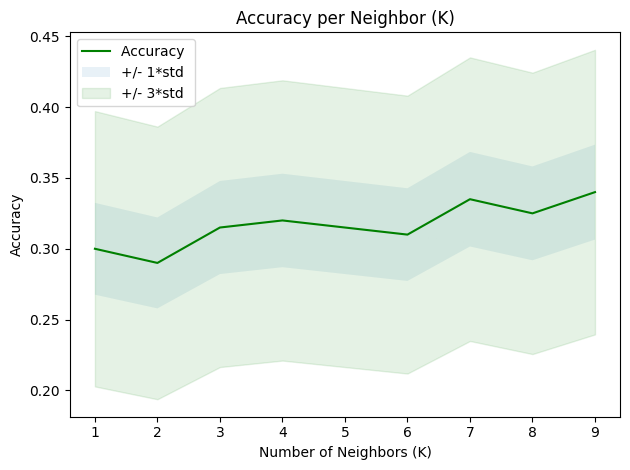

In [ ]:
# Plot the model accuracy for a different number of neighbors
plt.plot(range(1, Ks), mean_acc, 'g')
plt.fill_between(range(1, Ks), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha = 0.1)
plt.fill_between(range(1, Ks), mean_acc - 3 * std_acc, mean_acc + 3 * std_acc, alpha = 0.1, color = 'green')
plt.legend(('Accuracy ', '+/- 1*std', '+/- 3*std'))
plt.ylabel("Accuracy")
plt.xlabel("Number of Neighbors (K)")
plt.title("Accuracy per Neighbor (K)")
plt.tight_layout()
plt.show()

In [99]:
# Max accuracy and optimal k
print("The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.34 with k= 9


### Confusion Matrix
This section will build a confusion matrix to show the counts of true positives (TP), true negatives (TN), false positive (FP) and false negatives (FN), which help to understand where the model is making mistakes. A confusion matrix also helps to identify wheher the model is biased towards one class in case of class imbalance. We will analyse metrics such as:
1. Precision = TPi / (TPi + FPi) : Measures how many of the predicted positives are actually correct
2. Recall = TPi / (TPi + FNi) : Measures how many actual positives are correctly identified
3. F1-Score = Precisioni * Recalli / (Precisioni + Recalli) : Combines precision and recall into a single metric

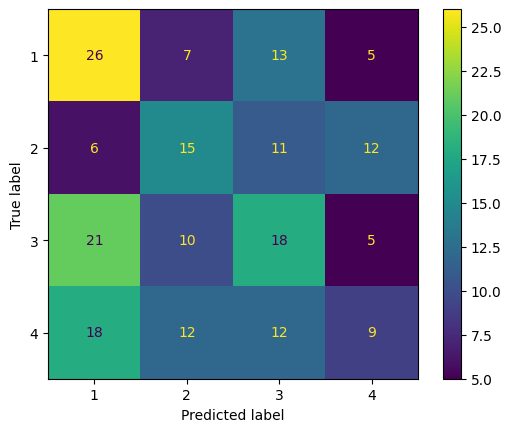

In [ ]:
# Model a KNN Classifier with optimal K value
# from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
neigh = KNeighborsClassifier(n_neighbors=9).fit(X_train, y_train)
yhat = neigh.predict(X_test)
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, yhat)
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=neigh.classes_)
disp.plot(cmap = 'viridis')
plt.show()

The diagonal values represent the True Positives, which were correctly classified:
- Class 1: 26
- Class 2: 15
- Class 3: 18
- Class 4: 9

The Off-Diagonal Values represent misclassifications:
- 13 samples of Class 1 were misclassified as Class 3
- 18 samples of Class 4 were misclassified as Class 2.

This indicates the model struggles with clear separations between classes, especially between Class 2 and Class 4.

In [114]:
# Model Evaluation metrics precision, recall and f1-score
print(classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       0.37      0.51      0.43        51
           2       0.34      0.34      0.34        44
           3       0.33      0.33      0.33        54
           4       0.29      0.18      0.22        51

    accuracy                           0.34       200
   macro avg       0.33      0.34      0.33       200
weighted avg       0.33      0.34      0.33       200



Model Evaluation:
1. Precision: Class 1 has the highest precision (0.37), meaning it is slighly better at minimising false positives compared to other classes. Class 4 has the lowest precision (0.29), indicating more false positives for this class.
2. Recall: Class 1 has the highest recall (0.51), meaning it correctly identifies more true positives than other classes. Class 4 has the lowest recall (0.18), indicating it misses most of the actual samples from Class 4.
3. F1-Score: All classes perform poorly, with the highest F1-score being 0.43 for Class 1

The results indicate that we should either try a better K-value or that KNN is not the best model for predicting the `custcat` classes.